<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/camxuc/blob/main/CNN_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [60]:
def create_img_dataset(raw_folder,dataset_name):
    target_size = (150, 150)
    pictures = []
    labels = []
    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)
    pictures = np.array(pictures)
    labels = np.array(labels)
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)
    file.close()
def load_data(dataset_path):
    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()
    return pictures, labels

In [61]:
raw_folder = "/content/drive/MyDrive/cam xuc"


create_img_dataset(raw_folder= raw_folder,dataset_name= 'dataset_money.txt')
x_data,y_data = load_data(dataset_path= 'dataset_money.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)

Folder= buon
File= b12.jpg
File= b13.jpg
File= b11.jpg
File= b10.jpg
File= b1.jpg
File= b30.jpg
File= b4.jpg
File= b3.jpg
File= b28.jpg
File= b8.jpg
File= b29.jpg
File= b6.jpg
File= b7.jpg
File= b9.jpg
File= b5.jpg
File= b27.jpg
File= b25.jpg
File= b26.jpg
File= b24.jpg
File= b23.jpg
File= b22.jpg
File= b20.jpg
File= b2.jpg
File= b21.jpg
File= b19.jpg
File= b15.jpg
File= b18.jpg
File= b17.jpg
File= b16.jpg
File= b14.jpg
Folder= hanh phuc
File= hp18.jpg
File= hp17.jpg
File= hp16.jpg
File= hp15.jpg
File= hp14.jpg
File= hp22.jpg
File= hp13.jpg
File= hp21.jpg
File= hp12.jpg
File= hp11.jpg
File= hp10.jpg
File= hp1.jpg
File= hp9.jpg
File= hp8.jpg
File= hp7.jpg
File= hp4.jpg
File= hp6.jpg
File= hp29.jpg
File= hp30.jpg
File= hp3.jpg
File= hp28.jpg
File= hp27.jpg
File= hp26.jpg
File= hp25.jpg
File= hp5.jpg
File= hp24.jpg
File= hp23.jpg
File= hp20.jpg
File= hp2.jpg
File= hp19 .jpg
Folder= gian
File= g13.jpg
File= g12.jpg
File= g11.jpg
File= g10.jpg
File= g1.jpg
File= g8.jpg
File= g9.jpg
File= g6

In [62]:
x_test_original = x_test;
y_test_original = y_test;

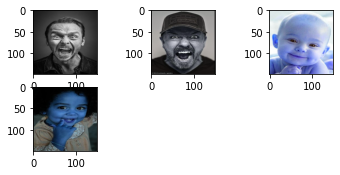

[0 1 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]


In [63]:
for i in range(4):
  plt.subplot(3,3,i+1)
  plt.imshow (x_test_original[i],cmap=plt.get_cmap('gray'))
plt.show()
for i in range(9):
  print(y_test_original[i])

In [64]:
x_label = [' buon ','gian du', 'ngac nhien','hanh phuc']

In [65]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#y_train = np_utils.to_categorical(y_train,9)
#y_test = np_utils.to_categorical(y_test,9)

In [66]:
model = Sequential()
model.add (Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 batch_normalization_16 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      25632     
                                                                 
 batch_normalization_17 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

In [58]:
checkpoint = ModelCheckpoint(filepath= "SelfFace-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr = 0.01, momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=10,batch_size = 2,validation_data=(x_test,y_test),verbose=1,callbacks=callbacks_list)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


48/48 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2526
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to SelfFace-weights-01-0.2500.h5
48/48 [==============================] - 45s 915ms/step - loss: nan - accuracy: 0.2526 - val_loss: nan - val_accuracy: 0.2500
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2526
Epoch 2: val_accuracy did not improve from 0.25000
48/48 [==============================] - 33s 694ms/step - loss: nan - accuracy: 0.2526 - val_loss: nan - val_accuracy: 0.2500
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2526
Epoch 3: val_accuracy did not improve from 0.25000
48/48 [==============================] - 33s 695ms/step - loss: nan - accuracy: 0.2526 - val_loss: nan - val_accuracy: 0.2500
Epoch 4/10
48/48 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2526
Epoch 4: val_accuracy did not improve from 0.25000
48/48 [==========

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print ('loss = ',score[0])
print ('accuracy = ',score[1])

picture  21
actual: [0 0 0 1]
predictions: [2]
predictions label: ngac nhien


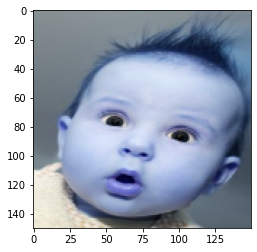

In [74]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

picture  16
actual: [0 0 0 1]
predictions: [2]
predictions label: ngac nhien


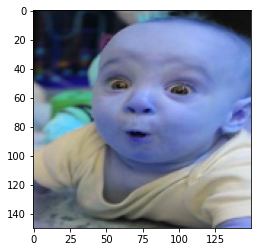

In [94]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

Link drive: https://drive.google.com/drive/folders/1CVL_8xqyN-Jw-kUwkX-pk6OJb5PSaJXB?usp=sharing
